In [1]:
from world_machine_experiments import toy1d, shared
from world_machine_experiments.toy1d import Dimensions
from world_machine_experiments.toy1d import base, multiple, parameter_variation

In [2]:
from hamilton import driver
from hamilton_sdk import adapters
from torch.optim import Adam, AdamW
import torch

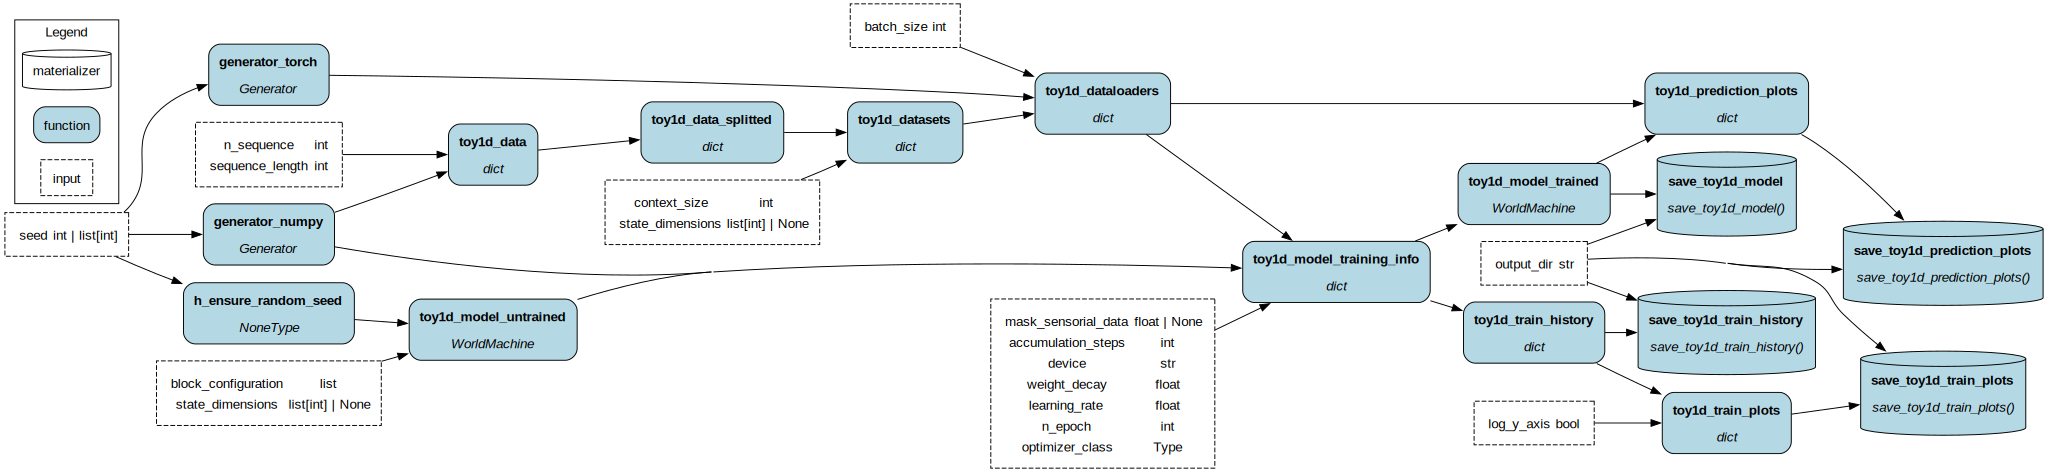

In [3]:
tracker = adapters.HamiltonTracker(
    project_id=1,
    username="EltonCN",
    dag_name="toy1d_base"
)

d = driver.Builder().with_modules(base, shared).with_adapter(tracker).build()

d.display_all_functions(deduplicate_inputs=True)

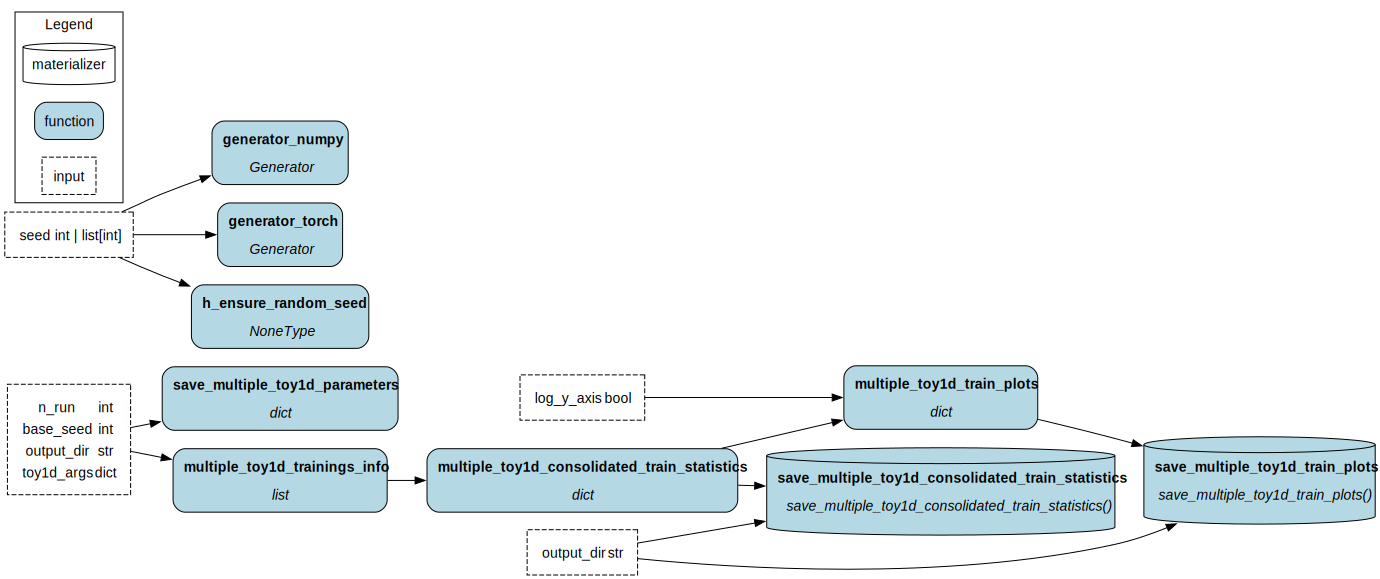

In [4]:
tracker = adapters.HamiltonTracker(
    project_id=1,
    username="EltonCN",
    dag_name="toy1d_multiple"
)

d_multiple= driver.Builder().with_modules(multiple, shared).with_adapter(tracker).build()

d_multiple.display_all_functions(deduplicate_inputs=True)

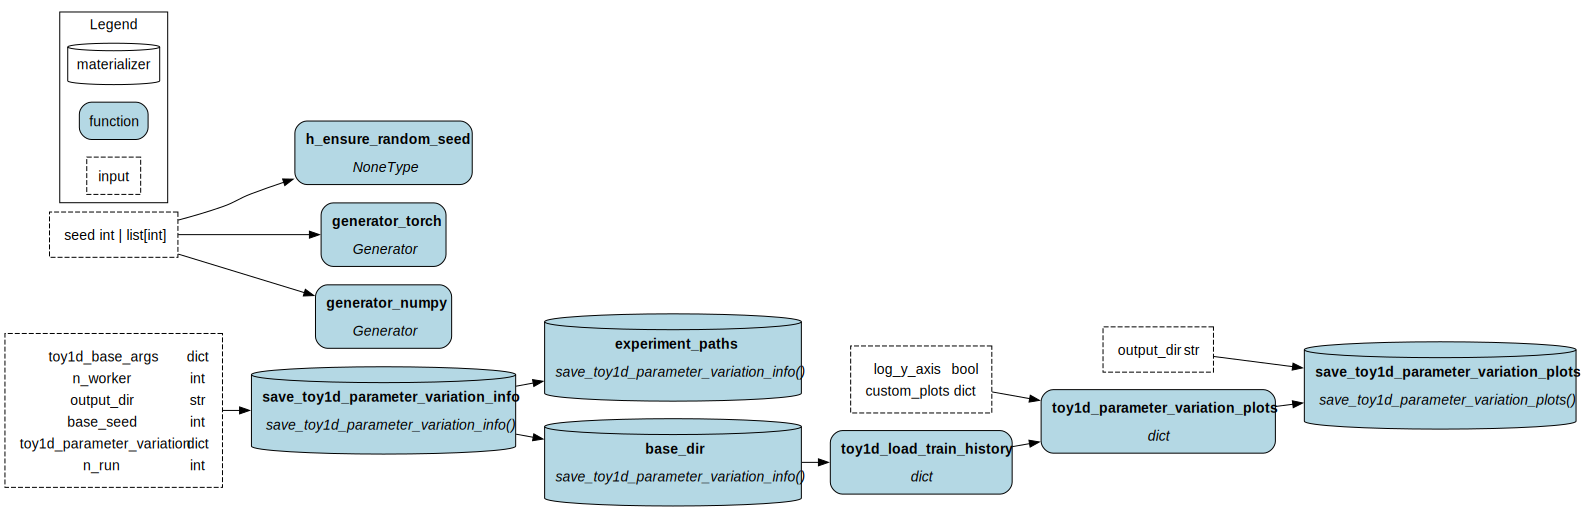

In [3]:
tracker = adapters.HamiltonTracker(
    project_id=1,
    username="EltonCN",
    dag_name="toy1d_parameter_variation"
)

d_parameter_variation = driver.Builder().with_modules(parameter_variation, shared).with_adapter(tracker).build()

d_parameter_variation.display_all_functions(deduplicate_inputs=True)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [ ]:


toy1d_base_args = {"sequence_length": 1000,
                        "n_sequence": 10000,
                        "context_size": 200,
                        "state_dimensions": None,
                        "batch_size": 32, 
                        "n_epoch": 5,
                        "learning_rate": 5e-3,
                        "weight_decay": 5e-4,
                        "accumulation_steps": 1,
                        "optimizer_class": AdamW,
                        "block_configuration": [Dimensions.STATE],
                        "device": device,
                        }

'''toy1d_parameter_variation = {"S":{"block_configuration":[Dimensions.STATE]},
                        "SS":{"block_configuration":[Dimensions.STATE, Dimensions.STATE]},
                        "M":{"block_configuration":[Dimensions.measurement]},
                        "MM":{"block_configuration":[Dimensions.measurement,Dimensions.measurement]},
                        "SM":{"block_configuration":[Dimensions.STATE,Dimensions.measurement]},
                        "MS":{"block_configuration":[Dimensions.measurement,Dimensions.STATE_CONTROL]},
                             }'''

toy1d_parameter_variation = {"C":{"block_configuration":[Dimensions.STATE]},
                        "CC":{"block_configuration":[Dimensions.STATE, Dimensions.STATE]},
                        "CS":{"block_configuration":[Dimensions.measurement]},
                             }

output = d_parameter_variation.execute(["save_toy1d_parameter_variation_plots"],
                   
                   inputs={"base_seed": 42,
                           "output_dir": "test",
                           "n_run": 5,
                           "toy1d_base_args": toy1d_base_args,
                           "n_worker":6,
                           "toy1d_parameter_variation":toy1d_parameter_variation}
                           )


Capturing execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/134

 67%|██████▋   | 2/3 [08:03<03:27, 207.76s/it]

In [17]:
d.execute(["save_toy1d_parameter_variation_plots"],
          inputs={"output_dir": "toy1d_block_configuration",
                  
                  "custom_plots": {"CvsM": ["C", "CC", "M", "MM"],
                                   "invert": ["SM", "MS"],
                                   "WithState":["CC", "MM", "MS", "CS", "SS"],
                                   "BlocksSingle":["S", "M", "C"],
                                   "OnlyState":["S", "SS"]},
                                   },

          overrides={"base_dir": "toy1d_block_configuration"})


Capturing execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/131


Captured execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/131



{'save_toy1d_parameter_variation_plots': {'state_decoded_mse_train': {'path': 'toy1d_block_configuration\\state_decoded_mse_train.png'},
  'state_decoded_mse_first_train': {'path': 'toy1d_block_configuration\\state_decoded_mse_first_train.png'},
  'optimizer_loss_train': {'path': 'toy1d_block_configuration\\optimizer_loss_train.png'},
  'state_decoded_mse_val': {'path': 'toy1d_block_configuration\\state_decoded_mse_val.png'},
  'state_decoded_mse_first_val': {'path': 'toy1d_block_configuration\\state_decoded_mse_first_val.png'},
  'optimizer_loss_val': {'path': 'toy1d_block_configuration\\optimizer_loss_val.png'},
  'CvsM_state_decoded_mse_train': {'path': 'toy1d_block_configuration\\CvsM_state_decoded_mse_train.png'},
  'CvsM_state_decoded_mse_first_train': {'path': 'toy1d_block_configuration\\CvsM_state_decoded_mse_first_train.png'},
  'CvsM_optimizer_loss_train': {'path': 'toy1d_block_configuration\\CvsM_optimizer_loss_train.png'},
  'CvsM_state_decoded_mse_val': {'path': 'toy1d_blo

In [5]:


toy1d_base_args = {"sequence_length": 1000,
                        "n_sequence": 10000,
                        "context_size": 200,
                        "state_dimensions": None,
                        "batch_size": 32, 
                        "n_epoch": 5,
                        "learning_rate": 5e-3,
                        "weight_decay": 5e-4,
                        "accumulation_steps": 1,
                        "optimizer_class": AdamW,
                        "block_configuration": [Dimensions.measurement],
                        "device": device,
                        }

toy1d_parameter_variation = {"0":{"mask_sensorial_data":0.0},
                             "025":{"mask_sensorial_data":0.25},
                             "05":{"mask_sensorial_data":0.5},
                             "075":{"mask_sensorial_data":0.75},
                             "1":{"mask_sensorial_data":1.0}
                             }

output = d_parameter_variation.execute(["save_toy1d_parameter_variation_plots"],
                   
                   inputs={"base_seed": 42,
                           "output_dir": "toy1d_mask_sensorial",
                           "n_run": 5,
                           "toy1d_base_args": toy1d_base_args,
                           "n_worker":6,
                           "toy1d_parameter_variation":toy1d_parameter_variation}
                           )


Capturing execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/141

  0%|          | 0/5 [00:19<?, ?it/s]

********************************************************************************
> save_toy1d_parameter_variation_info [world_machine_experiments.toy1d.parameter_variation.parameter_variation.save_toy1d_parameter_variation_info()] encountered an error<
> Node inputs:
{'base_seed': 42,
 'n_run': 5,
 'n_worker': 6,
 'output_dir': 'toy1d_mask_sensorial',
 'toy1d_base_args': "{'sequence_length': 1000, 'n_sequence': 10000, 'co...",
 'toy1d_parameter_variation': "{'0': {'mask_sensorial_data': 0.0}, '025': "
                              "{'mask_..."}
********************************************************************************
concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\eltsu\AppData\Local\Programs\Python\Python312\Lib\concurrent\futures\process.py", line 264, in _process_worker
    r = call_i

ValueError: negative dimensions are not allowed

In [9]:
import numpy as np
import matplotlib.pyplot as plt

train_history :dict[str, dict[str, np.ndarray]] = {}

train_history["S"]  = dict(np.load("toy1d_state_x1/toy1d_train_history.npz"))
train_history["M"]  = dict(np.load("toy1d_nm_x1/toy1d_train_history.npz"))
train_history["MS"] = dict(np.load("toy1d/toy1d_train_history.npz"))
train_history["SS"] = dict(np.load("toy1d_only_state/toy1d_train_history.npz"))
train_history["MC"] = dict(np.load("toy1d_all_sensorial/toy1d_train_history.npz"))
train_history["CS"] = dict(np.load("toy1d_state_control/toy1d_train_history.npz"))
train_history["CC"] = dict(np.load("toy1d_state_control_x2/toy1d_train_history.npz"))
train_history["MM"] = dict(np.load("toy1d_nm_x2/toy1d_train_history.npz"))
train_history["SC"] = dict(np.load("toy1d_state_control_inv/toy1d_train_history.npz"))
train_history["MCS"] = dict(np.load("toy1d_all_sensorial_state/toy1d_train_history.npz"))
train_history["CCC"] = dict(np.load("toy1d_state_control_x3/toy1d_train_history.npz"))

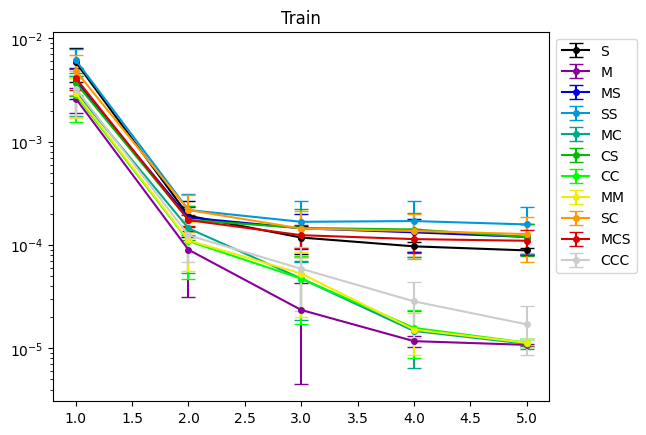

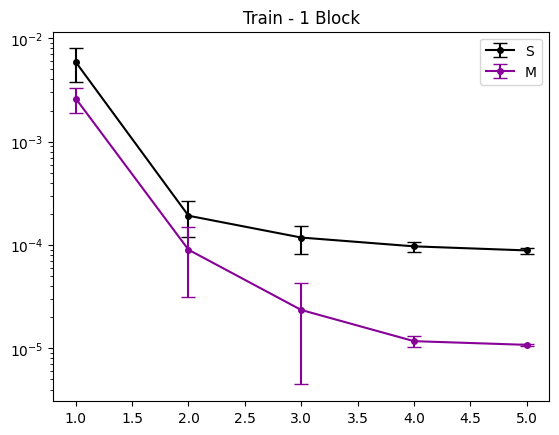

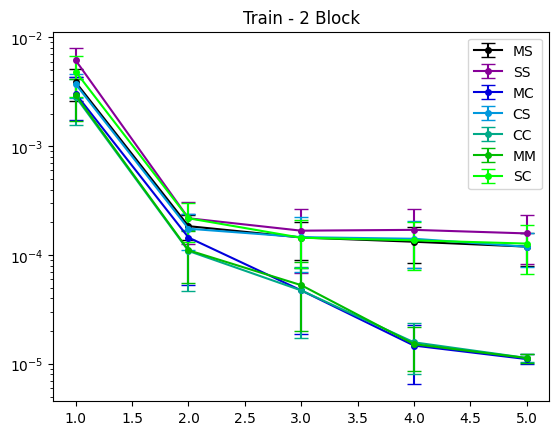

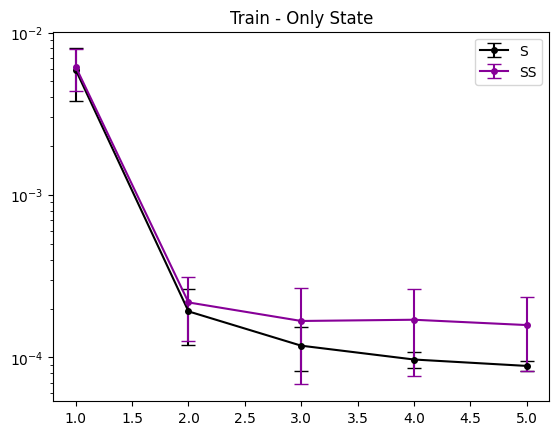

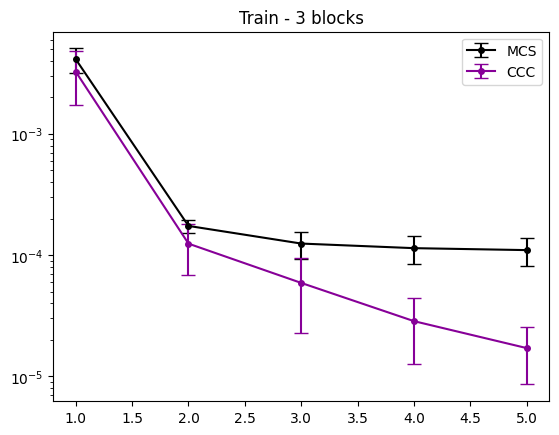

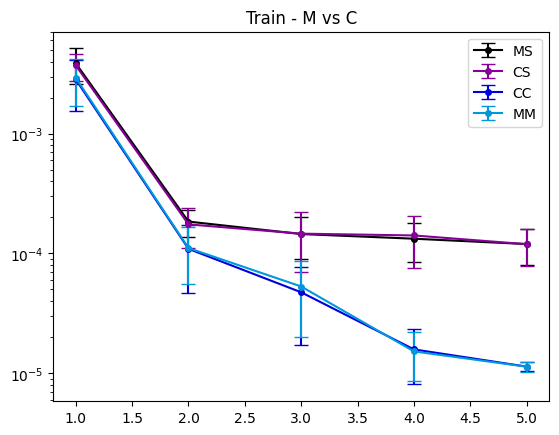

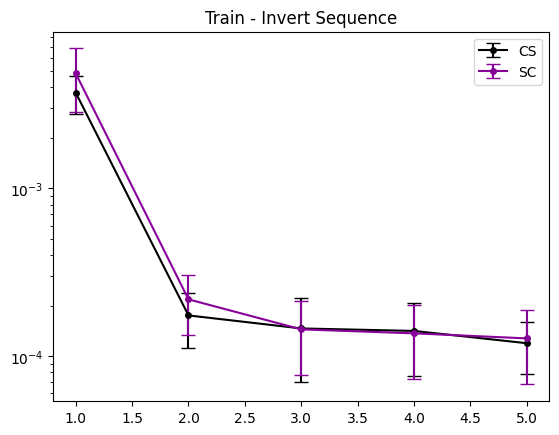

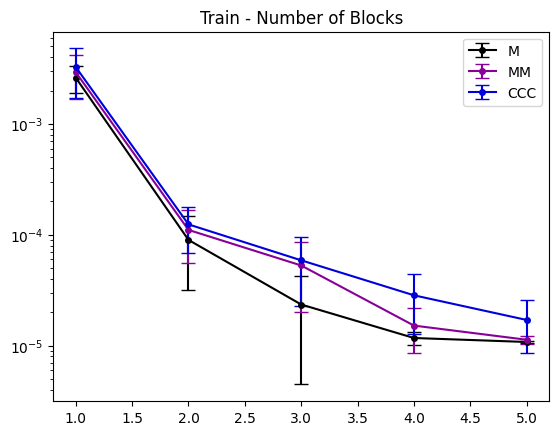

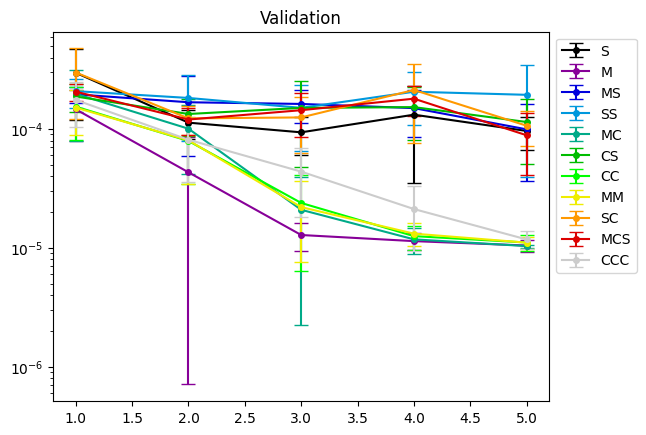

In [28]:
plot_args = {"fmt":"o-", "capsize":5.0, "markersize":4}

epochs = range(1, 5+1)
colormap = plt.cm.nipy_spectral
colors = colormap(np.linspace(0, 1, len(train_history)))

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_train"], 
                 train_history[block_sequence]["optimizer_loss_train_std"],
                 label=block_sequence,
                 **plot_args)
plt.yscale("log")
plt.title("Train")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    if len(block_sequence) > 1:
        continue
    
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_train"], 
                 train_history[block_sequence]["optimizer_loss_train_std"],
                 label=block_sequence,
                 **plot_args)    
plt.yscale("log")
plt.title("Train - 1 Block")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    if len(block_sequence) != 2:
        continue
    
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_train"], 
                 train_history[block_sequence]["optimizer_loss_train_std"],
                 label=block_sequence,
                 **plot_args)
plt.yscale("log")
plt.title("Train - 2 Block")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    if block_sequence.count("S") != len(block_sequence):
        continue
    
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_train"], 
                 train_history[block_sequence]["optimizer_loss_train_std"],
                 label=block_sequence,
                 **plot_args)
plt.yscale("log")
plt.title("Train - Only State")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    if len(block_sequence) != 3:
        continue
    
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_train"], 
                 train_history[block_sequence]["optimizer_loss_train_std"],
                 label=block_sequence,
                 **plot_args)
plt.yscale("log")
plt.title("Train - 3 blocks")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    if block_sequence not in ["CC", "MM", "MS", "CS"]:
        continue
    
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_train"], 
                 train_history[block_sequence]["optimizer_loss_train_std"],
                 label=block_sequence,
                 **plot_args)
plt.yscale("log")
plt.title("Train - M vs C")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    if block_sequence not in ["SC", "CS"]:
        continue
    
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_train"], 
                 train_history[block_sequence]["optimizer_loss_train_std"],
                 label=block_sequence,
                 **plot_args)
plt.yscale("log")
plt.title("Train - Invert Sequence")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    if block_sequence not in ["M", "MM", "CCC"]:
        continue
    
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_train"], 
                 train_history[block_sequence]["optimizer_loss_train_std"],
                 label=block_sequence,
                 **plot_args)
plt.yscale("log")
plt.title("Train - Number of Blocks")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_val"], 
                 train_history[block_sequence]["optimizer_loss_val_std"],
                 label=block_sequence,
                 **plot_args)

plt.yscale("log")

plt.title("Validation")
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

In [27]:
import glob
import os

import numpy as np
import matplotlib.pyplot as plt


paths = glob.glob("toy1d_optimizer\\*")

train_history :dict[str, dict[str, np.ndarray]] = {}
for path in paths:
    experiment_name = os.path.basename(path)
    history_path = os.path.join(path, "toy1d_train_history.npz")
    
    train_history[experiment_name] = dict(np.load(history_path))


In [41]:
os.path.isdir(paths[0])

True

In [35]:

names = set()
for name in train_history["AdamBase"]:
    names.add(name.removesuffix("_std").removesuffix("_train").removesuffix("_val"))
names.remove("duration")

names

{'optimizer_loss', 'state_decoded_mse', 'state_decoded_mse_first'}

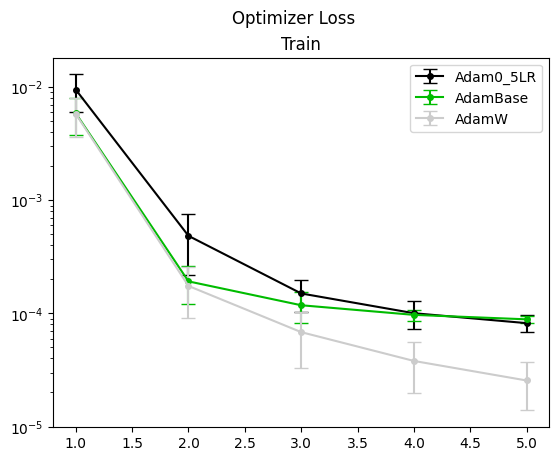

In [40]:
plot_args = {"fmt":"o-", "capsize":5.0, "markersize":4}

epochs = range(1, 5+1)
colormap = plt.cm.nipy_spectral
colors = colormap(np.linspace(0, 1, len(train_history)))

fig, ax = plt.subplots()
ax.set_prop_cycle('color', colors)
for block_sequence in train_history:
    plt.errorbar(epochs, 
                 train_history[block_sequence]["optimizer_loss_train"], 
                 train_history[block_sequence]["optimizer_loss_train_std"],
                 label=block_sequence,
                 **plot_args)

    
plt.yscale("log")
plt.suptitle("Optimizer Loss")
plt.title("Train")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [24]:
train_history["AdamBase"]["optimizer_loss_train"]

array([5.88968424e-03, 1.92052526e-04, 1.18116233e-04, 9.71037196e-05,
       8.86673733e-05])

In [31]:
train_history["AdamW"]["optimizer_loss_train"]

array([5.81175336e-03, 1.74935660e-04, 6.83047554e-05, 3.79961602e-05,
       2.55196317e-05])

In [1]:
from pydantic import create_model, ImportString

def _make_model(v, name):
    if type(v) is dict:
        return create_model(name, **{k: _make_model(v, k) for k, v in v.items()}), ...
    elif type(v) is type:
        return ImportString, v
    return type(v), v


def make_model(v: dict, name: str):
    return _make_model(v, name)[0]

In [17]:
import json

file = open("test.json", "w")

a = {"n_run":5,
     "base_seed":42,
     "toy1d_args":{"sequence_length": 1000,
                        "n_sequence": 10000,
                        "context_size": 200,
                        "state_dimensions": None,
                        "batch_size": 32, 
                        "n_epoch": 5,
                        "learning_rate": 5e-3,
                        "weight_decay": 5e-4,
                        "accumulation_steps": 1,
                        "optimizer_class": Adam,
                        "block_configuration": [Dimensions.STATE],
                        "device": device,
                        }}

model = make_model(a, "ParametersModel").model_validate(a)
model_json = model.model_dump_json(indent=4)

file.write(model_json)

file.close()

In [ ]:
json.loads(model_json).dump

{'n_run': 5,
 'base_seed': 42,
 'toy1d_args': {'sequence_length': 1000,
  'n_sequence': 10000,
  'context_size': 200,
  'state_dimensions': None,
  'batch_size': 32,
  'n_epoch': 5,
  'learning_rate': 0.005,
  'weight_decay': 0.0005,
  'accumulation_steps': 1,
  'optimizer_class': 'torch.optim.adam.Adam',
  'block_configuration': [0],
  'device': 'cuda'}}

In [13]:
import matplotlib.pyplot as plt
import numpy as np

colormap = plt.cm.nipy_spectral
colors = colormap(np.linspace(0, 1, 3))

names = ["a", "b", "c"]

{names[i]:colors[i] for i in range(len(colors))}

{'a': array([0., 0., 0., 1.]),
 'b': array([0.        , 0.73853137, 0.        , 1.        ]),
 'c': array([0.8, 0.8, 0.8, 1. ])}

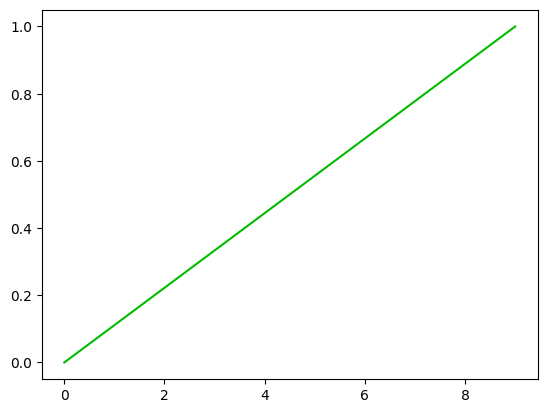

In [15]:
plt.plot(np.linspace(0,1,10), color=colors[1])

In [6]:
async def my_func():
    return 1

my_func()

<coroutine object my_func at 0x000002CC4ED6D380>